In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
from gspread_dataframe import get_as_dataframe

# Autentikasi dan koneksi
creds, _ = default()
gc = gspread.authorize(creds)

# Buka Spreadsheet
spreadsheet = gc.open_by_key("1aZ0LjvdZs1WHGphqb_nYrvPma8xEG9mxfM-O1_fsi3g")

# Ambil sheet Eksperimen_1 sebagai DataFrame
sheet = spreadsheet.worksheet("Eksperimen_1")
df = get_as_dataframe(sheet)

# Bersihkan baris kosong
df = df.dropna(how='all')
df.head()


,Timestamp,Mode,Task #,Jumlah Kategori,Kategori Dipilih,Kategori Benar,Hasil,Shapes Digunakan,Tipe Tampilan Bentuk
0,2025-06-05 01:06:06,latihan,1.0,5.0,Circle Dash,Circle Dash,Benar,"invertedtriangle-dash.png, rectangle-dash.png,...",open
1,2025-06-05 01:12:26,latihan,2.0,7.0,Rectangle Unfilled,Rectangle Unfilled,Benar,"arrow-unfilled.png, hexagon-unfilled.png, squa...",unfilled
2,2025-06-05 02:55:50,eksperimen,4.0,6.0,Arrow Filled,Arrow Filled,Benar,"pentagon-filled.png, arrow-filled.png, ellips-...",filled
3,2025-06-05 03:06:44,eksperimen,4.0,7.0,Triangle Unfilled,Triangle Unfilled,Benar,"pentagon-filled.png, plus-filled.png, hexagon-...",filled
4,2025-06-05 03:06:55,eksperimen,5.0,4.0,Cross Unfilled,Cross Unfilled,Benar,"cross-unfilled.png, star-unfilled.png, arrow-u...",unfilled


In [ ]:
# Rename kolom jika perlu (disesuaikan dengan yang kamu lihat di preview)
df.columns = [
    'Timestamp', 'Mode', 'Task', 'Jumlah Kategori', 'Kategori Dipilih',
    'Kategori Benar', 'Hasil', 'Shapes Digunakan', 'Tipe Tampilan'
]

# Tambahkan kolom skor biner berdasarkan 'Hasil'
df['Skor'] = df['Hasil'].apply(lambda x: 1 if str(x).strip().lower() == 'benar' else 0)

# Pastikan tipe data numerik
df['Jumlah Kategori'] = df['Jumlah Kategori'].astype(int)
df['Skor'] = df['Skor'].astype(int)

df.head()


,Timestamp,Mode,Task,Jumlah Kategori,Kategori Dipilih,Kategori Benar,Hasil,Shapes Digunakan,Tipe Tampilan,Skor
0,2025-06-05 01:06:06,latihan,1.0,5,Circle Dash,Circle Dash,Benar,"invertedtriangle-dash.png, rectangle-dash.png,...",open,1
1,2025-06-05 01:12:26,latihan,2.0,7,Rectangle Unfilled,Rectangle Unfilled,Benar,"arrow-unfilled.png, hexagon-unfilled.png, squa...",unfilled,1
2,2025-06-05 02:55:50,eksperimen,4.0,6,Arrow Filled,Arrow Filled,Benar,"pentagon-filled.png, arrow-filled.png, ellips-...",filled,1
3,2025-06-05 03:06:44,eksperimen,4.0,7,Triangle Unfilled,Triangle Unfilled,Benar,"pentagon-filled.png, plus-filled.png, hexagon-...",filled,1
4,2025-06-05 03:06:55,eksperimen,5.0,4,Cross Unfilled,Cross Unfilled,Benar,"cross-unfilled.png, star-unfilled.png, arrow-u...",unfilled,1


<ipython-input-7-3757648484>:24: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-3757648484>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


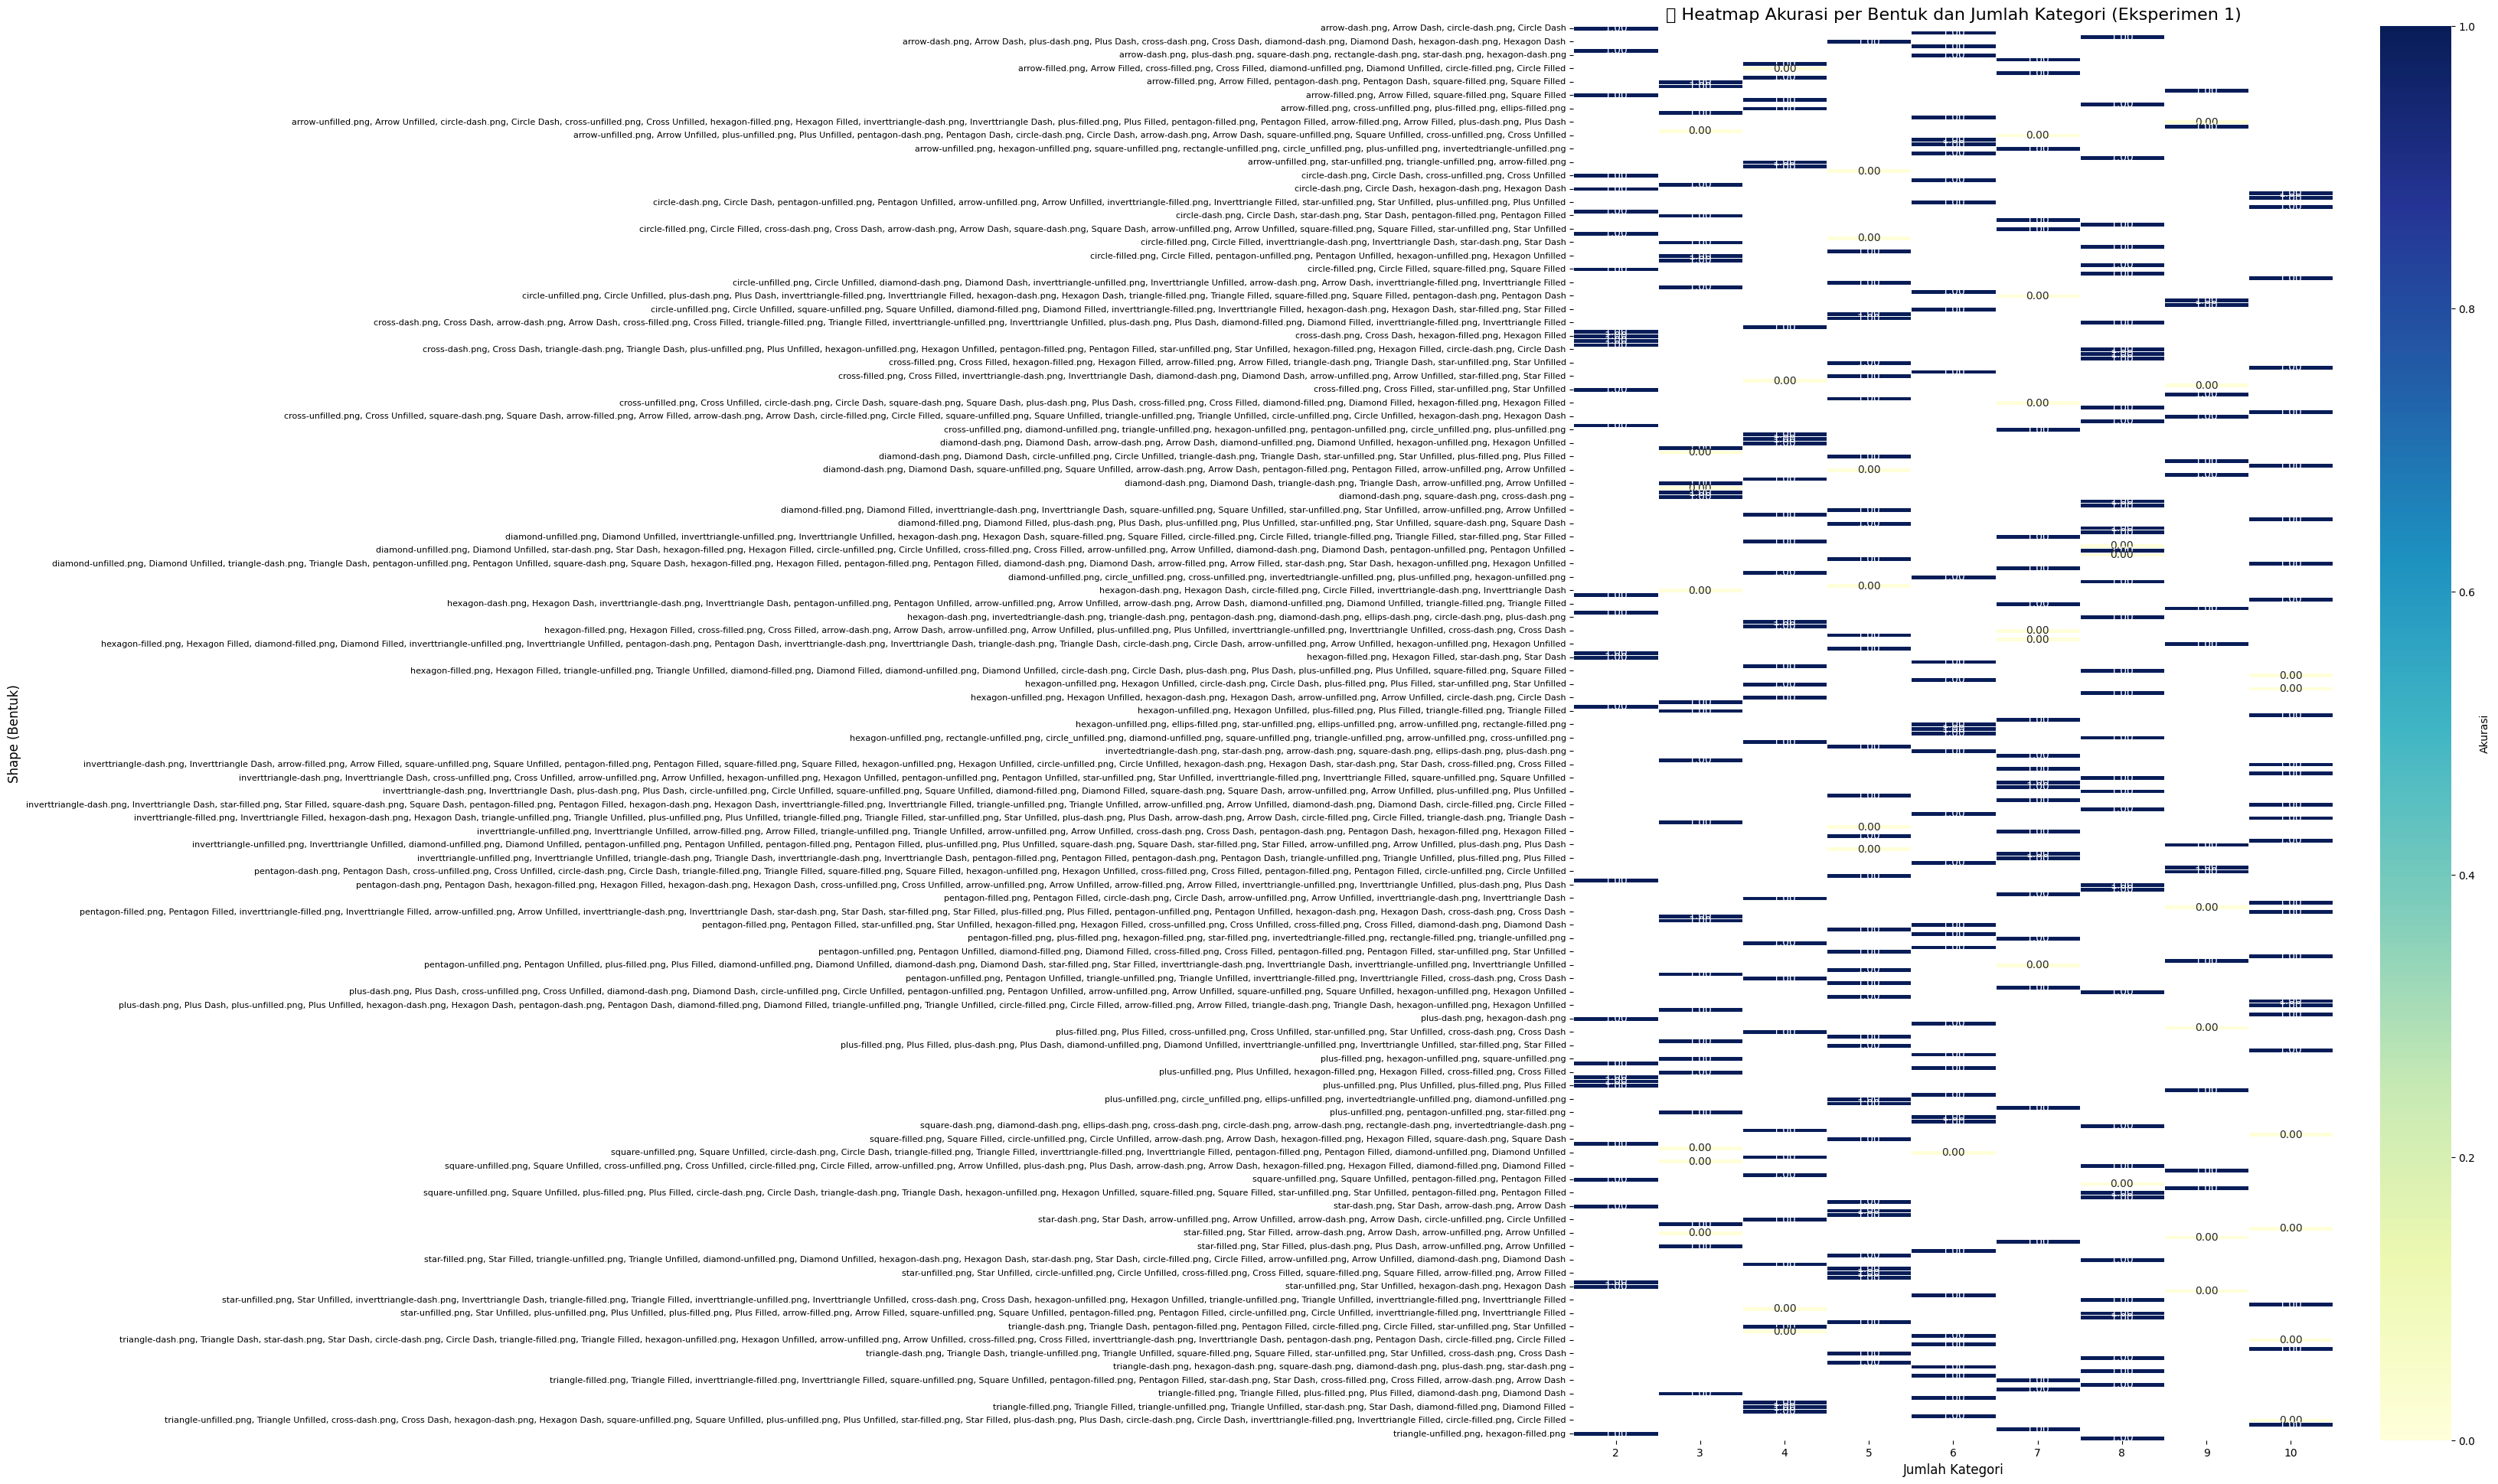

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- GROUPING: Hitung rata-rata skor per Shape (Shapes Digunakan) dan Jumlah Kategori ---
heatmap_data = df.groupby(['Shapes Digunakan', 'Jumlah Kategori'])['Skor'].mean().unstack()

# --- PLOT HEATMAP ---
plt.figure(figsize=(16, 24))  # Lebar x Tinggi, diperbesar agar tidak numpuk
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Akurasi"}
)

plt.title("🔥 Heatmap Akurasi per Bentuk dan Jumlah Kategori (Eksperimen 1)", fontsize=16)
plt.xlabel("Jumlah Kategori", fontsize=12)
plt.ylabel("Shape (Bentuk)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=8)  # biar semua bentuk kebaca
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- GROUPING: Hitung rata-rata skor per Shape (Shapes Digunakan) dan Jumlah Kategori ---
heatmap_data = df.groupby(['Shapes Digunakan', 'Jumlah Kategori'])['Skor'].mean().unstack()

# --- PLOT HEATMAP ---
plt.figure(figsize=(16, 24))  # Lebar x Tinggi, diperbesar agar tidak numpuk
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Akurasi"}
)

plt.title("🔥 Heatmap Akurasi per Bentuk dan Jumlah Kategori (Eksperimen 1)", fontsize=16)
plt.xlabel("Jumlah Kategori", fontsize=12)
plt.ylabel("Shape (Bentuk)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=8)  # biar semua bentuk kebaca
plt.tight_layout()
plt.show()


In [ ]:
# Ubah heatmap_data menjadi long format untuk pencarian akurasi tertinggi
best_shapes = (
    heatmap_data.reset_index()
    .melt(id_vars="Shapes Digunakan", var_name="Jumlah Kategori", value_name="Akurasi")
    .dropna()
)

# Ambil shape terbaik (akurasi tertinggi) untuk setiap jumlah kategori
top_per_kategori = (
    best_shapes.sort_values(by="Akurasi", ascending=False)
    .drop_duplicates(subset=["Jumlah Kategori"])
    .sort_values(by="Jumlah Kategori")
)

# Tampilkan
import pandas as pd
pd.set_option("display.max_colwidth", None)  # biar nama shape gak kepotong

top_per_kategori.reset_index(drop=True)

,Shapes Digunakan,Jumlah Kategori,Akurasi
0,"arrow-dash.png, Arrow Dash, circle-dash.png, Circle Dash",2,1.0
1,"diamond-dash.png, Diamond Dash, triangle-dash.png, Triangle Dash, arrow-unfilled.png, Arrow Unfilled",3,1.0
2,"diamond-dash.png, Diamond Dash, arrow-dash.png, Arrow Dash, circle-dash.png, Circle Dash, arrow-filled.png, Arrow Filled",4,1.0
3,"circle_unfilled.png, invertedtriangle-unfilled.png, star-filled.png, cross-unfilled.png, triangle-unfilled.png",5,1.0
4,"circle-unfilled.png, Circle Unfilled, pentagon-unfilled.png, Pentagon Unfilled, square-filled.png, Square Filled, triangle-filled.png, Triangle Filled, cross-dash.png, Cross Dash, triangle-dash.png, Triangle Dash",6,1.0
5,"arrow-filled.png, Arrow Filled, diamond-dash.png, Diamond Dash, circle-dash.png, Circle Dash, diamond-unfilled.png, Diamond Unfilled, circle-filled.png, Circle Filled, square-unfilled.png, Square Unfilled, inverttriangle-dash.png, Inverttriangle Dash",7,1.0
6,"arrow-unfilled.png, square-unfilled.png, circle_unfilled.png, triangle-unfilled.png, star-unfilled.png, invertedtriangle-unfilled.png, diamond-unfilled.png, pentagon-unfilled.png",8,1.0
7,"square-unfilled.png, Square Unfilled, pentagon-unfilled.png, Pentagon Unfilled, plus-unfilled.png, Plus Unfilled, triangle-unfilled.png, Triangle Unfilled, diamond-unfilled.png, Diamond Unfilled, circle-dash.png, Circle Dash, triangle-filled.png, Triangle Filled, star-dash.png, Star Dash, hexagon-unfilled.png, Hexagon Unfilled",9,1.0
8,"triangle-unfilled.png, Triangle Unfilled, inverttriangle-dash.png, Inverttriangle Dash, circle-dash.png, Circle Dash, square-dash.png, Square Dash, cross-unfilled.png, Cross Unfilled, hexagon-dash.png, Hexagon Dash, cross-dash.png, Cross Dash, arrow-dash.png, Arrow Dash, star-filled.png, Star Filled, hexagon-unfilled.png, Hexagon Unfilled",10,1.0


In [ ]:
# Tambahkan N (jumlah responden per jumlah kategori)
n_data = df.groupby("Jumlah Kategori")["Skor"].count().reset_index(name="Jumlah Responden")

# Gabungkan
top_per_kategori = top_per_kategori.merge(n_data, on="Jumlah Kategori", how="left")
top_per_kategori

,Shapes Digunakan,Jumlah Kategori,Akurasi,Jumlah Responden
0,"arrow-dash.png, Arrow Dash, circle-dash.png, Circle Dash",2,1.0,32
1,"diamond-dash.png, Diamond Dash, triangle-dash.png, Triangle Dash, arrow-unfilled.png, Arrow Unfilled",3,1.0,35
2,"diamond-dash.png, Diamond Dash, arrow-dash.png, Arrow Dash, circle-dash.png, Circle Dash, arrow-filled.png, Arrow Filled",4,1.0,37
3,"circle_unfilled.png, invertedtriangle-unfilled.png, star-filled.png, cross-unfilled.png, triangle-unfilled.png",5,1.0,44
4,"circle-unfilled.png, Circle Unfilled, pentagon-unfilled.png, Pentagon Unfilled, square-filled.png, Square Filled, triangle-filled.png, Triangle Filled, cross-dash.png, Cross Dash, triangle-dash.png, Triangle Dash",6,1.0,39
5,"arrow-filled.png, Arrow Filled, diamond-dash.png, Diamond Dash, circle-dash.png, Circle Dash, diamond-unfilled.png, Diamond Unfilled, circle-filled.png, Circle Filled, square-unfilled.png, Square Unfilled, inverttriangle-dash.png, Inverttriangle Dash",7,1.0,32
6,"arrow-unfilled.png, square-unfilled.png, circle_unfilled.png, triangle-unfilled.png, star-unfilled.png, invertedtriangle-unfilled.png, diamond-unfilled.png, pentagon-unfilled.png",8,1.0,44
7,"square-unfilled.png, Square Unfilled, pentagon-unfilled.png, Pentagon Unfilled, plus-unfilled.png, Plus Unfilled, triangle-unfilled.png, Triangle Unfilled, diamond-unfilled.png, Diamond Unfilled, circle-dash.png, Circle Dash, triangle-filled.png, Triangle Filled, star-dash.png, Star Dash, hexagon-unfilled.png, Hexagon Unfilled",9,1.0,23
8,"triangle-unfilled.png, Triangle Unfilled, inverttriangle-dash.png, Inverttriangle Dash, circle-dash.png, Circle Dash, square-dash.png, Square Dash, cross-unfilled.png, Cross Unfilled, hexagon-dash.png, Hexagon Dash, cross-dash.png, Cross Dash, arrow-dash.png, Arrow Dash, star-filled.png, Star Filled, hexagon-unfilled.png, Hexagon Unfilled",10,1.0,32


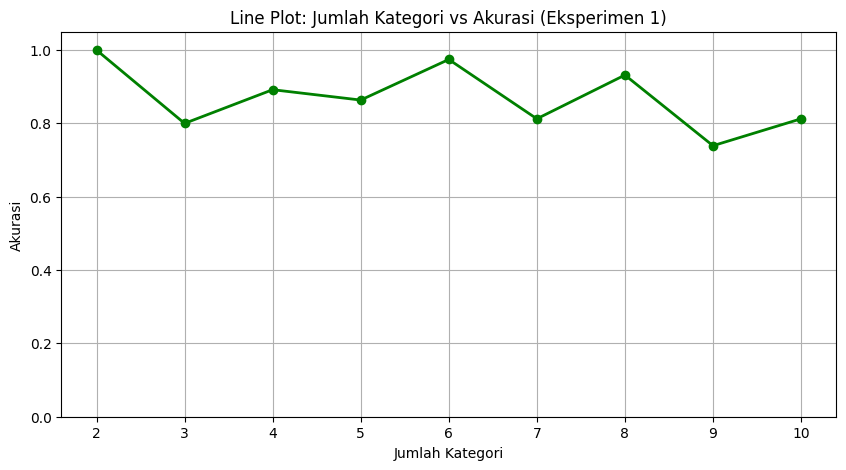

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gspread
from google.auth import default
from gspread_dataframe import get_as_dataframe

# Autentikasi
creds, _ = default()
gc = gspread.authorize(creds)

# Buka spreadsheet dan worksheet Eksperimen_1
sheet = gc.open_by_key("1aZ0LjvdZs1WHGphqb_nYrvPma8xEG9mxfM-O1_fsi3g").worksheet("Eksperimen_1")
df = get_as_dataframe(sheet)
df = df.dropna(how='all')  # Hapus baris kosong

# Rename kolom (jika perlu)
df.columns = ['Waktu', 'Mode', 'Task #', 'Jumlah Kategori', 'Kategori Dipilih', 'Kategori Benar', 'Hasil', 'Shapes Digunakan', 'Tipe Tampilan Bentuk']

# Tambahkan kolom Skor
df['Skor'] = df['Hasil'].str.strip().str.lower().apply(lambda x: 1 if x == 'benar' else 0)
df['Jumlah Kategori'] = df['Jumlah Kategori'].astype(int)

# Hitung akurasi per jumlah kategori
summary = df.groupby('Jumlah Kategori').agg(Akurasi=('Skor', 'mean'),
                                            Jumlah_Responden=('Skor', 'count')).reset_index()

# --- Line Plot ---
plt.figure(figsize=(10, 5))
plt.plot(summary['Jumlah Kategori'], summary['Akurasi'], marker='o', color='green', linewidth=2)
plt.ylim(0, 1.05)
plt.xlabel("Jumlah Kategori")
plt.ylabel("Akurasi")
plt.title("Line Plot: Jumlah Kategori vs Akurasi (Eksperimen 1)")
plt.grid(True)
plt.xticks(summary['Jumlah Kategori'])
plt.show()